# model Grus grus

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sqlalchemy import create_engine

import os
from pmdarima.arima import auto_arima

from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
import statsmodels.api as sm

/usr/lib/python3/dist-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.25.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
df_Grus_grus= pd.read_csv("df_Grus_grus")

In [3]:
df_Grus_grus.head()

,Unnamed: 0,eventDate,year,month,day,continent,Country,City,Specie
0,0,2010-09-10T10:00:00,2010,9,10,EUROPE,Estonia,Põlva,Grus grus
1,1,2010-09-10T10:00:00,2010,9,10,EUROPE,Estonia,Põlva,Grus grus
2,2,2010-09-10T10:00:00,2010,9,10,EUROPE,Estonia,Jõgeva,Grus grus
3,3,2010-09-11T10:00:00,2010,9,11,EUROPE,Estonia,Põlva,Grus grus
4,4,2010-09-11T10:00:00,2010,9,11,EUROPE,Estonia,Jõgeva,Grus grus


In [4]:
df_Grus_grus["eventDate"] = pd.to_datetime(df_Grus_grus["eventDate"])

df_Grus_grus["eventDate"]= df_Grus_grus["eventDate"].dt.strftime('%Y/%m/%d')

In [5]:
df_Grus_grus.drop("Unnamed: 0", axis =1, inplace = True)

In [6]:
df_Grus_grus.set_index(df_Grus_grus["eventDate"], inplace=True)

In [7]:
# df_ciconia_ciconia.drop(["eventDate"], axis= 1, inplace = True)

In [8]:
df_Grus_grus

,eventDate,year,month,day,continent,Country,City,Specie
eventDate,,,,,,,,
2010/09/10,2010/09/10,2010,9,10,EUROPE,Estonia,Põlva,Grus grus
2010/09/10,2010/09/10,2010,9,10,EUROPE,Estonia,Põlva,Grus grus
2010/09/10,2010/09/10,2010,9,10,EUROPE,Estonia,Jõgeva,Grus grus
2010/09/11,2010/09/11,2010,9,11,EUROPE,Estonia,Põlva,Grus grus
2010/09/11,2010/09/11,2010,9,11,EUROPE,Estonia,Jõgeva,Grus grus
...,...,...,...,...,...,...,...,...
2022/04/15,2022/04/15,2022,4,15,EUROPE,Estonia,Saare,Grus grus
2022/04/15,2022/04/15,2022,4,15,EUROPE,Russia,Pskov,Grus grus
2022/04/15,2022/04/15,2022,4,15,EUROPE,Estonia,Tartu,Grus grus


# SQL connector

In [9]:
import mysql.connector as sql    # intsall mysql-connector-python not sql-connector

In [10]:
hostname="localhost"
dbname="cdac_project"
uname="root"
pwd="manager"

In [11]:
engine = create_engine("mysql+pymysql://{user}:{pw}@{host}/{db}"
				.format(host=hostname, db=dbname, user=uname, pw=pwd))

In [12]:
# df_Grus_grus.to_sql(f'df_Grus_grus_24_12', engine, index=False)

In [13]:
# this we shifted below
mydb = sql.connect(
    host="localhost", user="root", password="manager", database="cdac_project"
)



In [14]:
def query(query):
    mycursor = mydb.cursor()
    sql = query
    mycursor.execute(sql)
    result = mycursor.fetchall()
    mycursor.close()

    return pd.DataFrame(result)

In [15]:
df_Grus_grus.head()

,eventDate,year,month,day,continent,Country,City,Specie
eventDate,,,,,,,,
2010/09/10,2010/09/10,2010,9,10,EUROPE,Estonia,Põlva,Grus grus
2010/09/10,2010/09/10,2010,9,10,EUROPE,Estonia,Põlva,Grus grus
2010/09/10,2010/09/10,2010,9,10,EUROPE,Estonia,Jõgeva,Grus grus
2010/09/11,2010/09/11,2010,9,11,EUROPE,Estonia,Põlva,Grus grus
2010/09/11,2010/09/11,2010,9,11,EUROPE,Estonia,Jõgeva,Grus grus


In [16]:
df_observation = query("SELECT COUNT(eventDate), eventDate as daily_spotting  FROM df_Grus_grus_24_12 GROUP BY daily_spotting ORDER BY eventDate")


In [17]:
df_observation.rename({0:"daily_frequency",1:"date",2:"country",3:"city",4:"continent"},axis = 1, inplace=True)

In [18]:
df_observation

,daily_frequency,date
0,3,2010/09/10
1,3,2010/09/11
2,3,2010/09/12
3,3,2010/09/13
4,3,2010/09/14
...,...,...
3573,96,2022/04/11
3574,95,2022/04/12
3575,92,2022/04/13
3576,88,2022/04/14


In [19]:
df_observation.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3578 entries, 0 to 3577
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   daily_frequency  3578 non-null   int64 
 1   date             3578 non-null   object
dtypes: int64(1), object(1)
memory usage: 56.0+ KB


In [20]:
pd.to_datetime(df_observation["date"])

0      2010-09-10
1      2010-09-11
2      2010-09-12
3      2010-09-13
4      2010-09-14
          ...    
3573   2022-04-11
3574   2022-04-12
3575   2022-04-13
3576   2022-04-14
3577   2022-04-15
Name: date, Length: 3578, dtype: datetime64[ns]

In [21]:
df_observation

,daily_frequency,date
0,3,2010/09/10
1,3,2010/09/11
2,3,2010/09/12
3,3,2010/09/13
4,3,2010/09/14
...,...,...
3573,96,2022/04/11
3574,95,2022/04/12
3575,92,2022/04/13
3576,88,2022/04/14


In [22]:
df_demo = df_observation.copy()

In [23]:
df_demo.set_index("date", inplace=True)

In [24]:
# df_demo.drop("date", axis =1, inplace = True)
df_demo.isna().sum()

daily_frequency    0
dtype: int64

In [25]:
df_demo.isna().sum()

daily_frequency    0
dtype: int64

In [26]:
# del df_demo["country"],df_demo["city"],df_demo["continent"]

In [27]:
df_demo.index.freq = "D"

In [28]:
df_demo

,daily_frequency
date,
2010/09/10,3
2010/09/11,3
2010/09/12,3
2010/09/13,3
2010/09/14,3
...,...
2022/04/11,96
2022/04/12,95
2022/04/13,92


In [29]:
size = int(len(df_demo)*0.8)

df_train = df_demo.iloc[:size]
df_test  = df_demo.iloc[size:]

In [30]:
df_train.tail()

,daily_frequency
date,
2020/03/14,387
2020/03/15,399
2020/03/16,375
2020/03/17,330
2020/03/18,385


In [31]:
df_test.head()

,daily_frequency
date,
2020/03/19,366
2020/03/20,343
2020/03/21,343
2020/03/22,360
2020/03/23,369


<Axes: xlabel='date'>

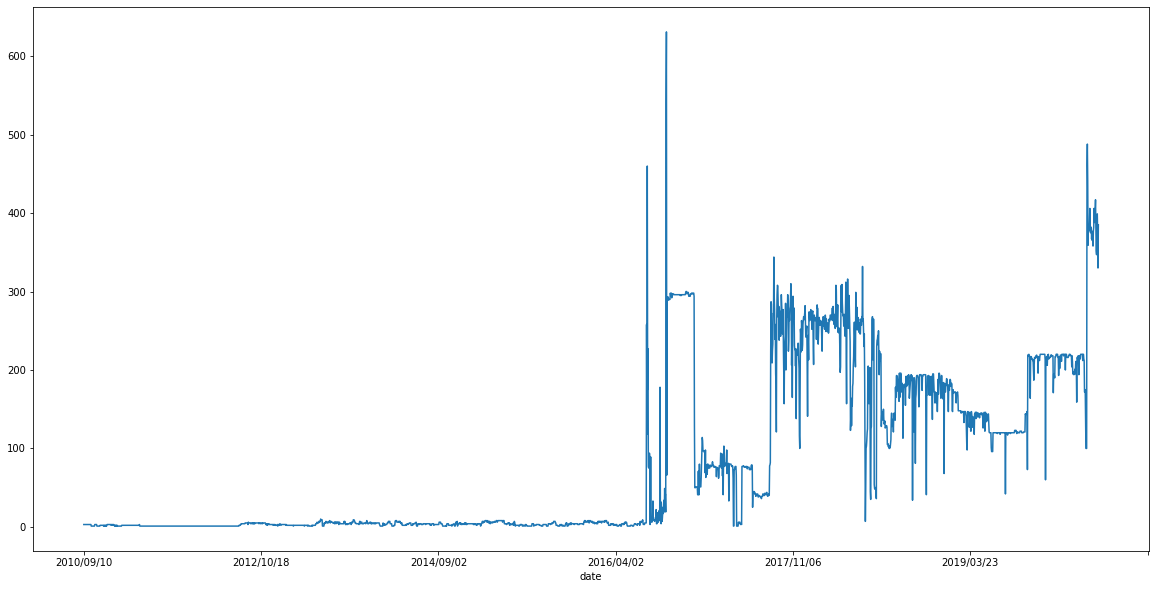

In [32]:
plt.figure(figsize=(20,10))
df_train.daily_frequency.plot()

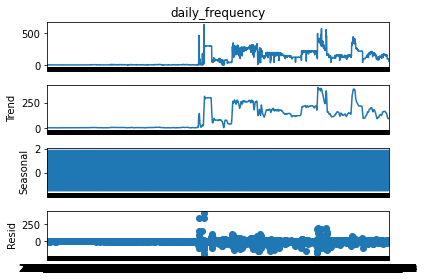

In [33]:
dec=seasonal_decompose(df_demo["daily_frequency"],period=12)
dec.plot()
plt.show()

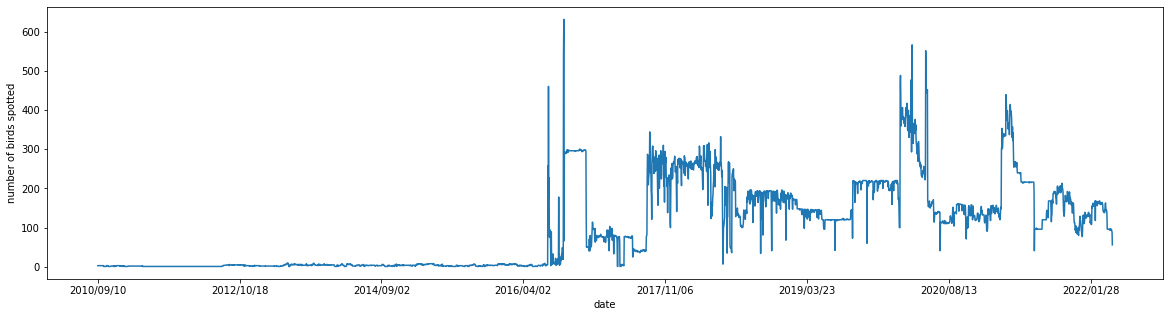

In [34]:
plt.figure(figsize=(20,5))
plt.grid(True)
plt.xlabel('Date')
plt.ylabel('number of birds spotted')
df_demo["daily_frequency"].plot()
# plt.title('ARCH CAPITAL GROUP closing price')
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


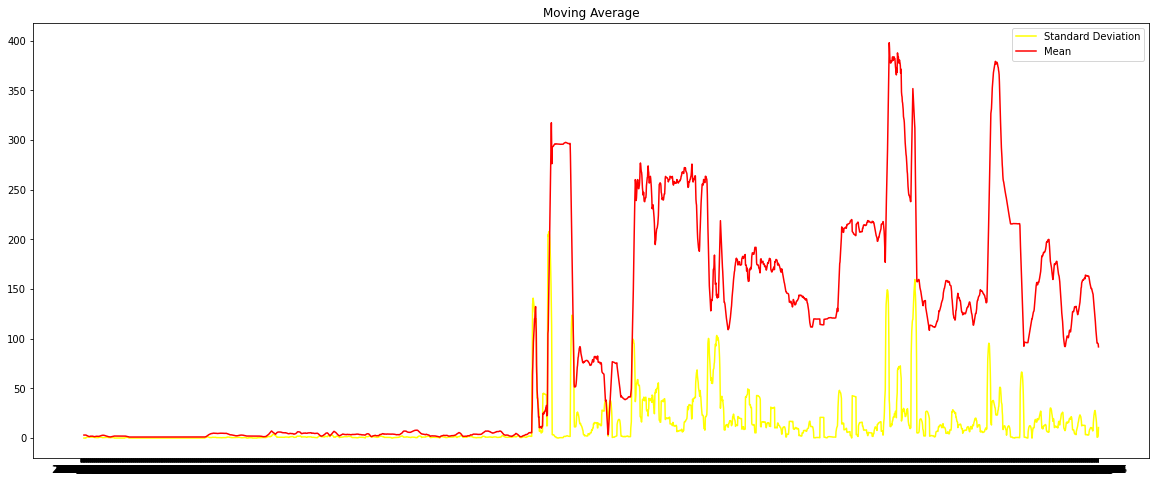

In [35]:
from pylab import rcParams

rcParams["figure.figsize"] = 20,8
moving_avg = df_demo.rolling(14).mean()
moving_std = df_demo.rolling(14).std()

plt.legend(loc='best')
plt.title('Moving Average')
plt.plot(moving_std, color ="yellow", label = "Standard Deviation")
plt.plot(moving_avg, color="red", label = "Mean")
plt.legend()
plt.show()

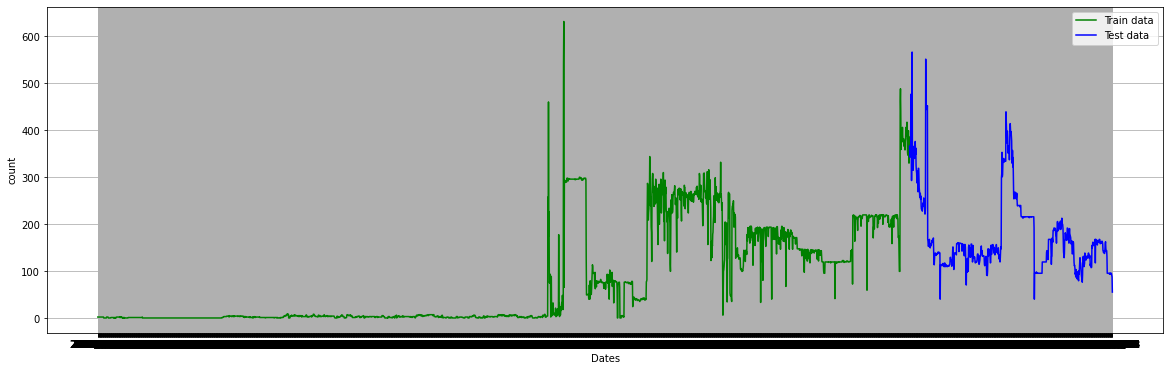

In [36]:
plt.figure(figsize=(20,6))
plt.grid(True)
plt.xlabel('Dates')
plt.ylabel('count')
plt.plot(df_train, 'green', label='Train data')
plt.plot(df_test , 'blue', label='Test data')
plt.legend()

Performing stepwise search to minimize aic
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=36039.460, Time=0.09 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=26895.775, Time=0.06 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=32975.217, Time=0.14 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=26730.553, Time=0.07 sec
 ARIMA(3,0,0)(0,0,0)[0]             : AIC=inf, Time=0.07 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=26554.568, Time=0.14 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=26642.524, Time=0.21 sec
 ARIMA(3,0,1)(0,0,0)[0]             : AIC=26555.009, Time=0.50 sec
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=26554.615, Time=0.68 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=26575.625, Time=0.35 sec
 ARIMA(3,0,2)(0,0,0)[0]             : AIC=26557.695, Time=0.51 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=26553.442, Time=0.63 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=26637.777, Time=0.35 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=26721.458, Time=0.16 sec
 ARIMA(3,0,1)(0,0,0)[0] i

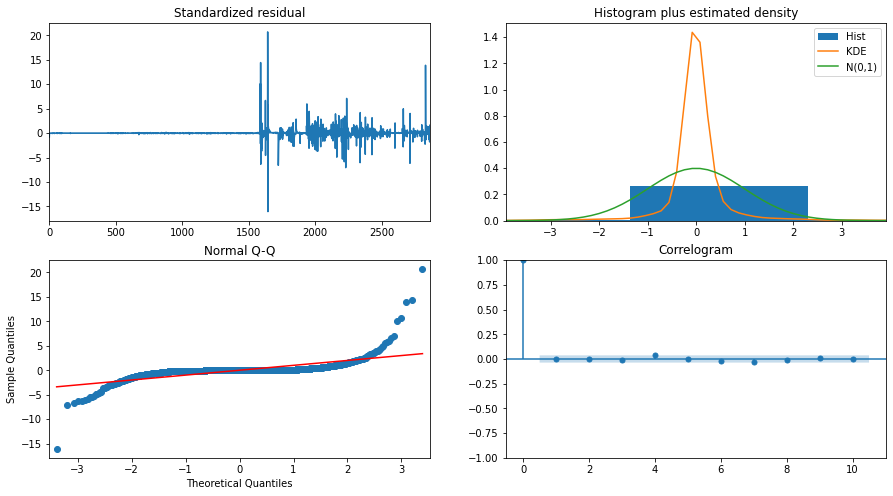

In [37]:
model_autoARIMA = auto_arima(df_train, start_p=0, start_q=0,
                      test='adf',       # use adftest to find optimal 'd'
                      max_p=3, max_q=3, # maximum p and q
                      m=1,              # frequency of series
                      d=None,           # let model determine 'd'
                      seasonal=False,   # No Seasonality
                      start_P=0, 
                      D=0, 
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True)
print(model_autoARIMA.summary())
model_autoARIMA.plot_diagnostics(figsize=(15,8))
plt.show()

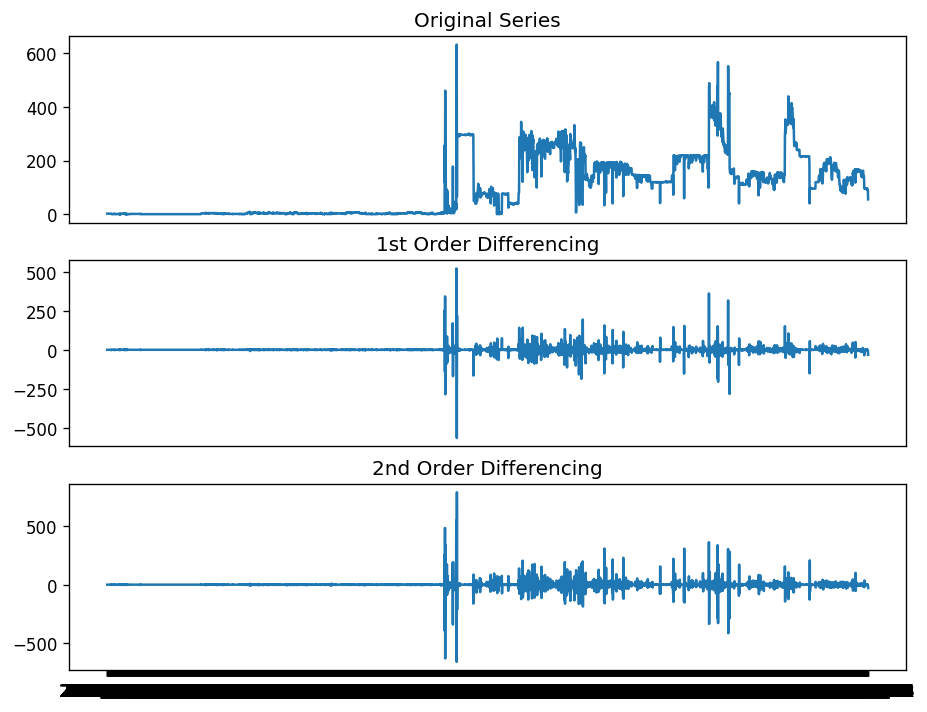

In [38]:
plt.rcParams.update({'figure.figsize':(9,7), 'figure.dpi':120})
 
# Original Series
fig, (ax1, ax2, ax3) = plt.subplots(3)
ax1.plot(df_demo["daily_frequency"]); ax1.set_title('Original Series'); ax1.axes.xaxis.set_visible(False)
# 1st Differencing
ax2.plot(df_demo["daily_frequency"].diff()); ax2.set_title('1st Order Differencing'); ax2.axes.xaxis.set_visible(False)
# 2nd Differencing
ax3.plot(df_demo["daily_frequency"].diff().diff()); ax3.set_title('2nd Order Differencing')
plt.show()

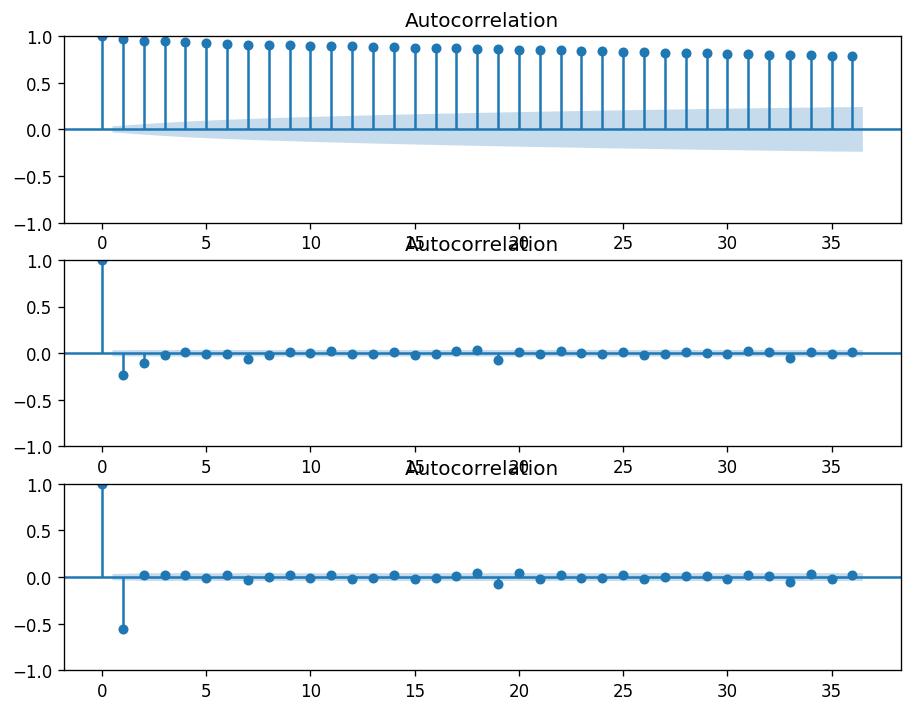

In [39]:
from statsmodels.graphics.tsaplots import plot_acf
fig, (ax1, ax2, ax3) = plt.subplots(3)
plot_acf(df_demo["daily_frequency"], ax=ax1)
plot_acf(df_demo["daily_frequency"].diff().dropna(), ax=ax2)
plot_acf(df_demo["daily_frequency"].diff().diff().dropna(), ax=ax3)
plt.show()

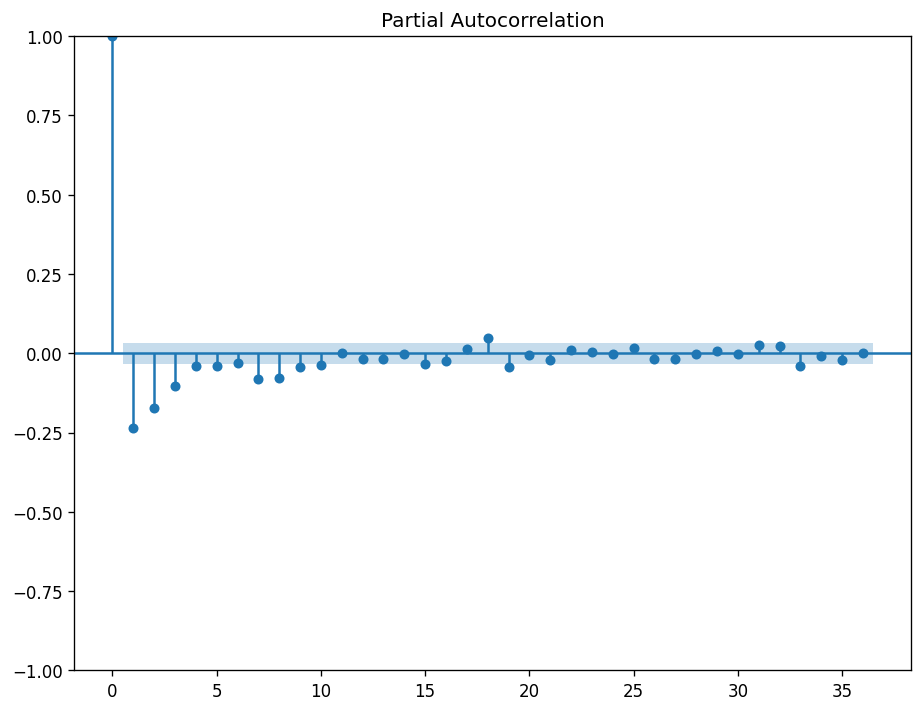

In [40]:
from statsmodels.graphics.tsaplots import plot_pacf
plot_pacf(df_demo["daily_frequency"].diff().dropna())
plt.show()

In [41]:
def TestStationaryPlot(fd):
    rol_mean = fd.rolling(window = 20, center = False).mean()
    rol_std = fd.rolling(window = 20, center = False).std()
    
    plt.plot(fd, color = 'blue',label = 'Original Data')
    plt.plot(rol_mean, color = 'red', label = 'Rolling Mean')
    plt.plot(rol_std, color ='black', label = 'Rolling Std')
    plt.xticks(fontsize = 10)
    plt.yticks(fontsize = 10)
    
    plt.xlabel('Time in Years', fontsize = 10)
    plt.ylabel('Total Emissions', fontsize = 10)
    plt.legend(loc='best', fontsize = 10)
    plt.title('Rolling Mean & Standard Deviation', fontsize = 10)
    plt.show(block= True)

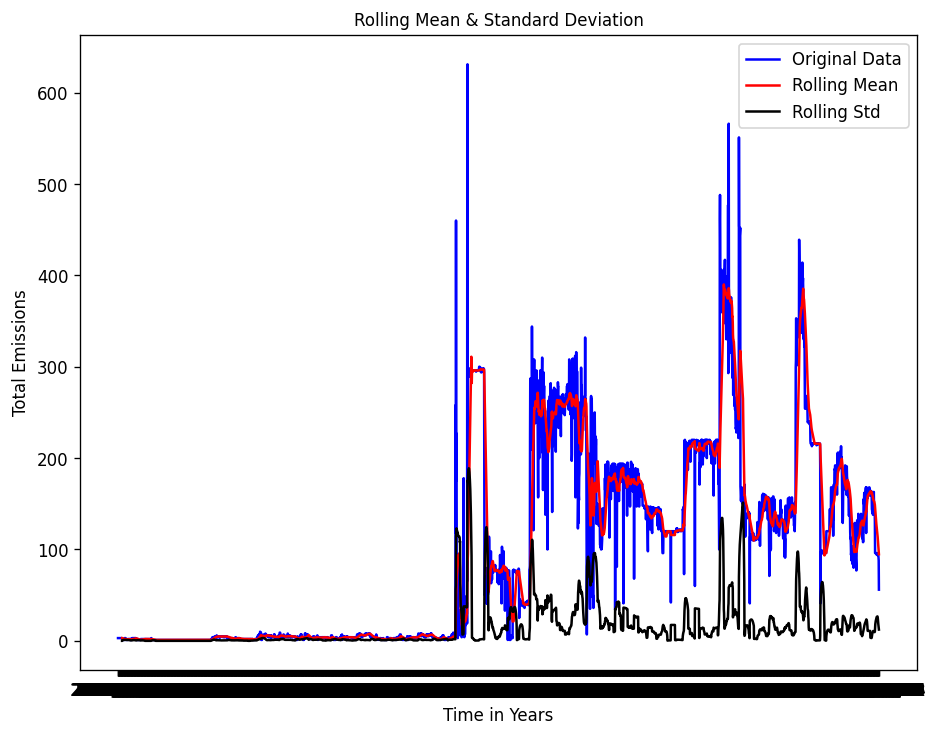

In [42]:
TestStationaryPlot(df_demo)

In [43]:
# null Hypothesis : Data is stationary
#alternate hypothesis : Data is not stationary
def TestStationaryAdfuller(fd, cutoff = 0.01):
    fd_test = adfuller(fd, autolag = 'AIC')
    fd_test_output = pd.Series(fd_test[0:4], index=['Test Statistic','p-value','Lags Used','Number of Observations Used'])
    
    for key,value in fd_test[4].items():
        fd_test_output['Critical Value (%s)'%key] = value
    print(fd_test_output)
    
    if fd_test[1] <= cutoff:
        print("Failed to reject null hypothesis. Data is stationary")
    else:
        print("Failed to accept null hypothesis. Data is non-stationary ")
        

In [44]:
TestStationaryAdfuller(df_demo)

Test Statistic                   -3.040447
p-value                           0.031286
Lags Used                        19.000000
Number of Observations Used    3558.000000
Critical Value (1%)              -3.432189
Critical Value (5%)              -2.862353
Critical Value (10%)             -2.567203
dtype: float64
Failed to accept null hypothesis. Data is non-stationary 


## Moving Average Method

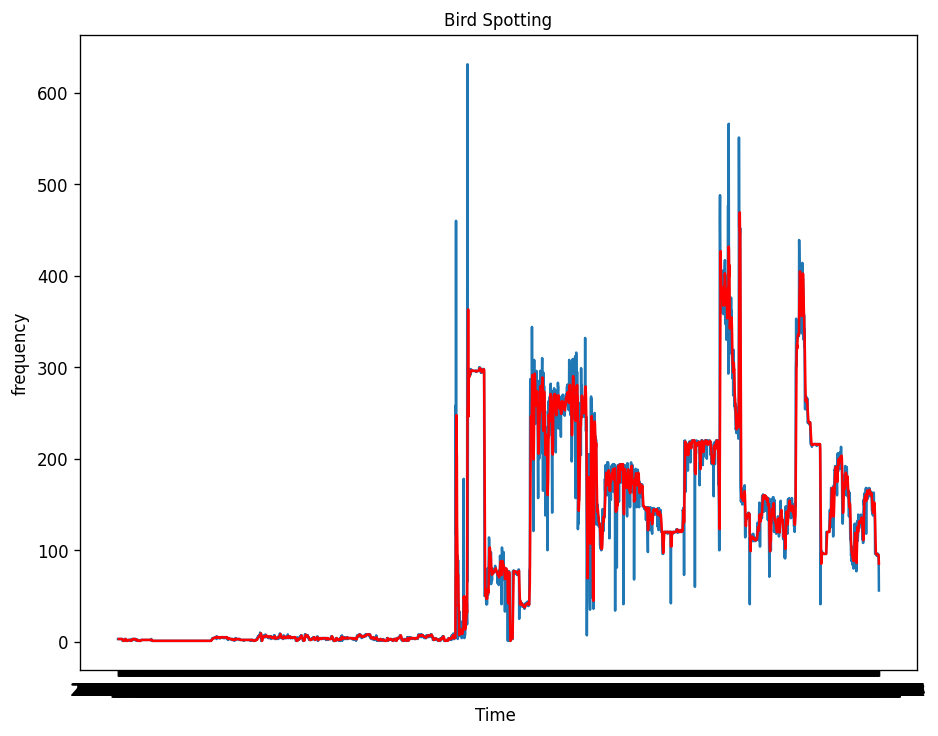

In [45]:
moving_avg = df_demo["daily_frequency"].rolling(5).mean()
plt.plot(df_demo["daily_frequency"])
plt.plot(moving_avg, color='red')
plt.xticks(fontsize = 10)
plt.yticks(fontsize = 10)
plt.xlabel('Time ', fontsize = 10)
plt.ylabel('frequency', fontsize = 10)
plt.title('Bird Spotting', fontsize = 10)
plt.show()

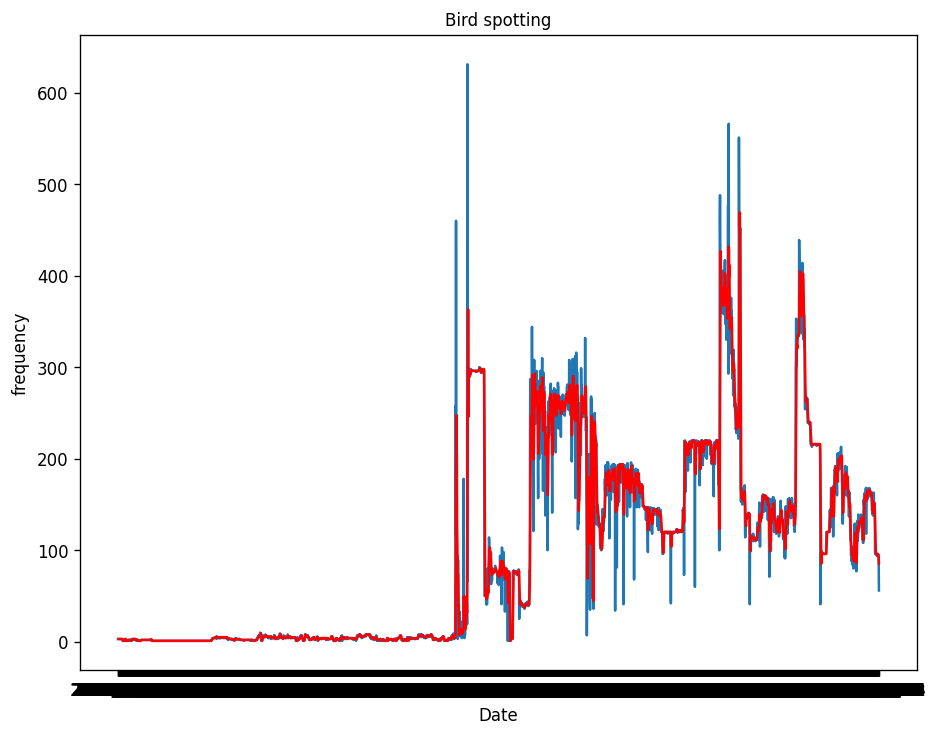

date
2010/09/10    NaN
2010/09/11    NaN
2010/09/12    NaN
2010/09/13    NaN
2010/09/14    0.0
2010/09/15    0.0
2010/09/16    0.0
2010/09/17    0.0
2010/09/18    0.0
2010/09/19    0.0
2010/09/20    0.0
2010/09/21    0.0
2010/09/22    0.0
Name: daily_frequency, dtype: float64

In [46]:
moving_avg = df_demo["daily_frequency"].rolling(5).mean()
plt.plot(df_demo)
plt.plot(moving_avg, color='red')
plt.xticks(fontsize = 10)
plt.yticks(fontsize = 10)
plt.xlabel('Date', fontsize = 10)
plt.ylabel('frequency', fontsize = 10)
plt.title('Bird spotting', fontsize = 10)
plt.show()
moving_avg_diff = df_demo["daily_frequency"] - moving_avg
moving_avg_diff.head(13)

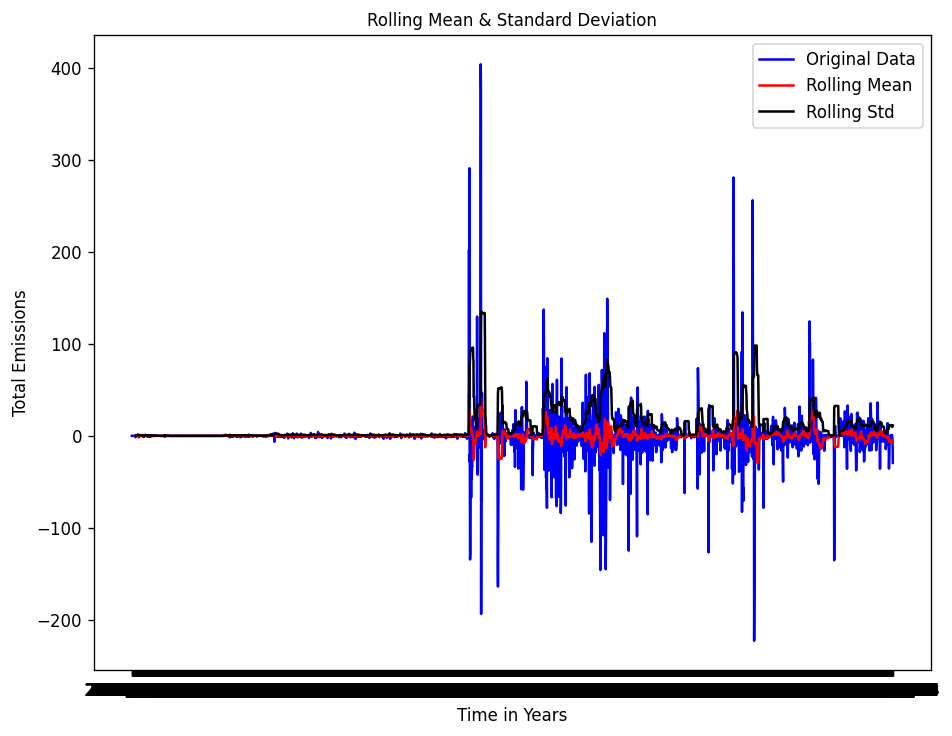

In [47]:
moving_avg_diff.dropna(inplace=True)
TestStationaryPlot(moving_avg_diff)

In [48]:
TestStationaryAdfuller(moving_avg_diff)

Test Statistic                -1.501543e+01
p-value                        1.040696e-27
Lags Used                      1.900000e+01
Number of Observations Used    3.554000e+03
Critical Value (1%)           -3.432191e+00
Critical Value (5%)           -2.862354e+00
Critical Value (10%)          -2.567203e+00
dtype: float64
Failed to reject null hypothesis. Data is stationary


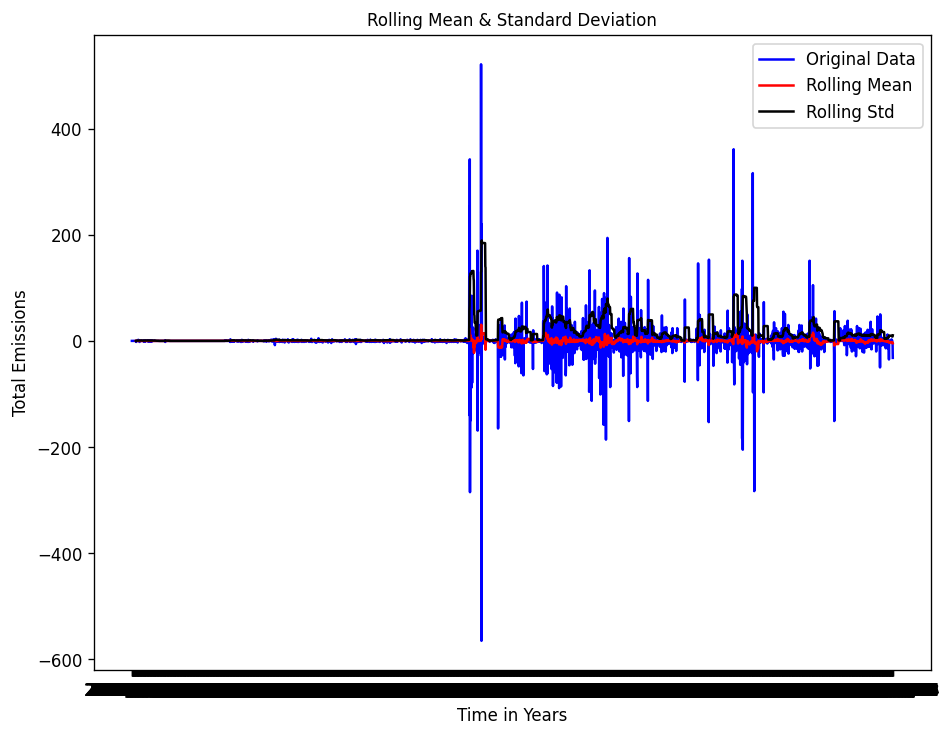

In [49]:
df_first_difference = df_demo["daily_frequency"] - df_demo["daily_frequency"].shift(1)  
TestStationaryPlot(df_first_difference.dropna(inplace=False))
# df_demo

In [50]:
df_first_difference.tail(15
                        )

date
2022/04/01     0.0
2022/04/02     0.0
2022/04/03     0.0
2022/04/04     0.0
2022/04/05    -2.0
2022/04/06     2.0
2022/04/07     0.0
2022/04/08    -2.0
2022/04/09     2.0
2022/04/10    -2.0
2022/04/11     2.0
2022/04/12    -1.0
2022/04/13    -3.0
2022/04/14    -4.0
2022/04/15   -32.0
Name: daily_frequency, dtype: float64

In [51]:
TestStationaryAdfuller(df_first_difference.dropna(inplace=False))

Test Statistic                -1.644640e+01
p-value                        2.401066e-29
Lags Used                      1.800000e+01
Number of Observations Used    3.558000e+03
Critical Value (1%)           -3.432189e+00
Critical Value (5%)           -2.862353e+00
Critical Value (10%)          -2.567203e+00
dtype: float64
Failed to reject null hypothesis. Data is stationary


## ACF & PACF  

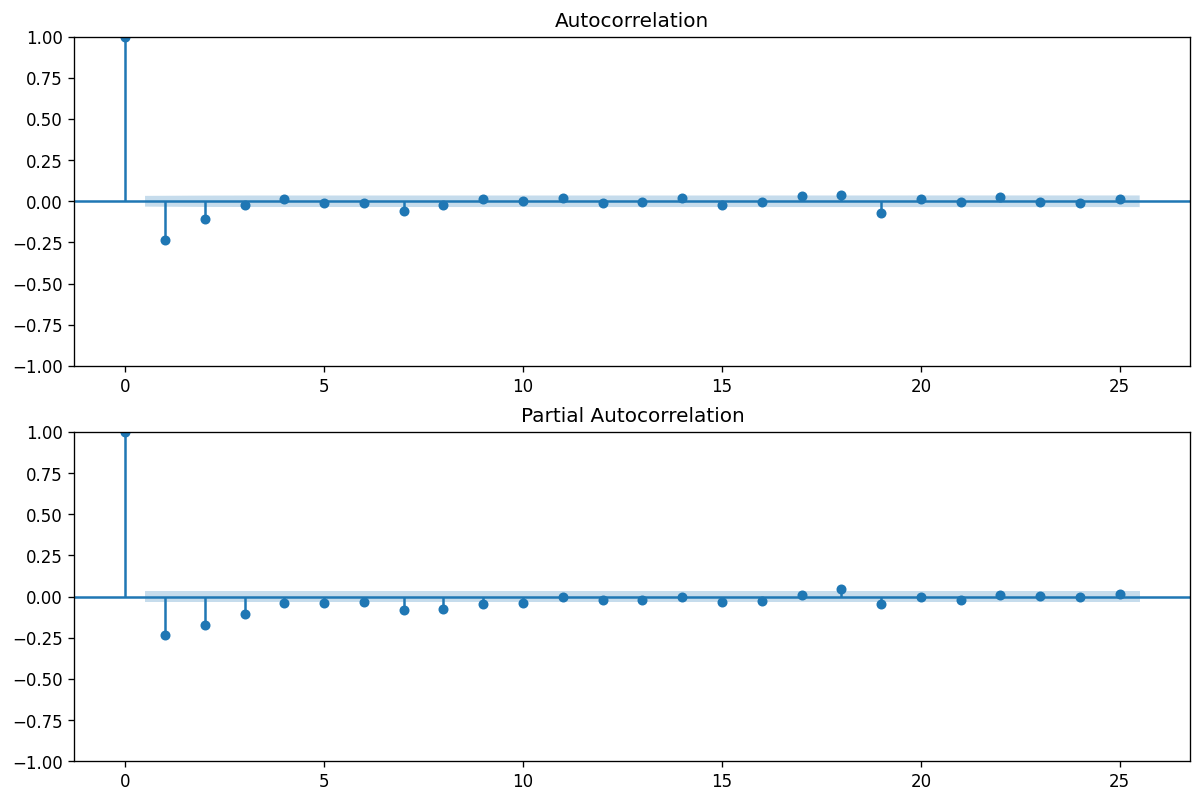

In [52]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(df_first_difference.dropna(inplace=False), lags=25, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(df_first_difference.dropna(inplace=False), lags=25, ax=ax2)

In [64]:



list_pdq = [(4,0,11),(4,0,14),(9,0,11),(9,0,14)]

def forecast_accuracy(forecast, actual):

    
    mape = np.mean(np.abs(forecast - actual)/(actual))  # MAPE
    me = np.mean(forecast - actual)             # ME
    mae = np.mean(np.abs(forecast - actual))    # MAE
    rmse = np.mean((forecast - actual)**2)**.5  # RMSE

    
    
    return({'mape':mape, 'me':me, 'mae': mae, 'rmse':rmse})

    

In [61]:
from statsmodels.tsa.arima.model import ARIMA

for pdq in list_pdq:
    model = ARIMA(df_train,order=pdq)
    fitted = model.fit()
    
    print(fitted.summary())

/home/sunbeam/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/sunbeam/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/sunbeam/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/sunbeam/.local/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization 

                               SARIMAX Results                                
Dep. Variable:        daily_frequency   No. Observations:                 2862
Model:                ARIMA(4, 0, 11)   Log Likelihood              -13257.909
Date:                Mon, 25 Dec 2023   AIC                          26549.818
Time:                        23:32:09   BIC                          26651.126
Sample:                             0   HQIC                         26586.345
                               - 2862                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         79.7117    137.576      0.579      0.562    -189.932     349.355
ar.L1          0.7792      0.461      1.691      0.091      -0.124       1.682
ar.L2         -0.3627      0.129     -2.802      0.0

/home/sunbeam/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/sunbeam/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/sunbeam/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/sunbeam/.local/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization 

                               SARIMAX Results                                
Dep. Variable:        daily_frequency   No. Observations:                 2862
Model:                ARIMA(4, 0, 14)   Log Likelihood              -13257.537
Date:                Mon, 25 Dec 2023   AIC                          26555.074
Time:                        23:32:35   BIC                          26674.259
Sample:                             0   HQIC                         26598.047
                               - 2862                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         79.7075    358.430      0.222      0.824    -622.803     782.217
ar.L1          0.4151      1.165      0.356      0.722      -1.868       2.698
ar.L2         -0.3652      0.721     -0.506      0.6

/home/sunbeam/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/sunbeam/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/sunbeam/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/sunbeam/.local/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization 

                               SARIMAX Results                                
Dep. Variable:        daily_frequency   No. Observations:                 2862
Model:                ARIMA(9, 0, 11)   Log Likelihood              -13245.895
Date:                Mon, 25 Dec 2023   AIC                          26535.790
Time:                        23:32:53   BIC                          26666.894
Sample:                             0   HQIC                         26583.061
                               - 2862                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         79.7038    153.932      0.518      0.605    -221.998     381.406
ar.L1          0.3115      0.804      0.387      0.699      -1.265       1.888
ar.L2          0.2628      0.125      2.106      0.0

/home/sunbeam/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/sunbeam/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/sunbeam/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/sunbeam/.local/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization 

                               SARIMAX Results                                
Dep. Variable:        daily_frequency   No. Observations:                 2862
Model:                ARIMA(9, 0, 14)   Log Likelihood              -13247.898
Date:                Mon, 25 Dec 2023   AIC                          26545.796
Time:                        23:33:26   BIC                          26694.778
Sample:                             0   HQIC                         26599.513
                               - 2862                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         79.7040    292.380      0.273      0.785    -493.350     652.758
ar.L1         -0.2092      0.363     -0.576      0.565      -0.921       0.503
ar.L2         -0.5530      0.249     -2.220      0.0

### Considering the fact that overfitting might play a role here,
### ARIMA(9,0,11) would be a model very suitable

In [66]:
final_arima = ARIMA(df_demo["daily_frequency"], order = (9,0,11))
final_arima = final_arima.fit()
final_arima.summary()

/home/sunbeam/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/sunbeam/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/sunbeam/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/sunbeam/.local/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization 

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:        daily_frequency   No. Observations:                 3578
Model:                ARIMA(9, 0, 11)   Log Likelihood              -16578.833
Date:                Mon, 25 Dec 2023   AIC                          33201.666
Time:                        23:38:18   BIC                          33337.682
Sample:                             0   HQIC                         33250.154
                               - 3578                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         99.0267     66.998      1.478      0.139     -32.288     230.341
ar.L1          0.0103      0.356      0.029      0.977      -0.688       0.708
ar.L2          0.3207      0.259      1.241      0.215      -0.186       0.827
ar.L3          0.0509      0.108      0.473      0.636      -0.160       0.262
ar.L4          0.3345      0.086      3.874      0.000       0.165       0.504
ar.L5          0.3316      0.049      6.834      0.000       0.236       0.427
ar.L6          0.0189      0.093      0.203      0.839      -0.164       0.202
ar.L7          0.6812      0.063     10.879      0.000       0.558       0.804
ar.L8         -0.1456      0.304     -0.478      0.632      -0.742       0.451
ar.L9         -0.6102      0.261     -2.337      0.019      -1.122      -0.099
ma.L1          0.6772      0.356      1.901      0.057      -0.021       1.376
ma.L2          0.2257      0.092      2.465      0.014       0.046       0.405
ma.L3          0.2546      0.155      1.648      0.099      -0.048       0.557
ma.L4         -0.0303      0.103     -0.295      0.768      -0.232       0.171
ma.L5         -0.2756      0.065     -4.214      0.000      -0.404      -0.147
ma.L6         -0.1471      0.083     -1.778      0.075      -0.309       0.015
ma.L7         -0.8185      0.041    -20.141      0.000      -0.898      -0.739
ma.L8         -0.4552      0.302     -1.505      0.132      -1.048       0.138
ma.L9          0.2366      0.074      3.199      0.001       0.092       0.381
ma.L10         0.0649      0.030      2.128      0.033       0.005       0.125
ma.L11         0.0228      0.020      1.129      0.259      -0.017       0.062
sigma2       614.4538      3.837    160.131      0.000     606.933     621.975
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):           1915390.63
Prob(Q):                              0.93   Prob(JB):                         0.00
Heteroskedasticity (H):             305.38   Skew:                             3.38
Prob(H) (two-sided):                  0.00   Kurtosis:                       116.15
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [67]:
final_arima.fittedvalues.tail()


date
2022/04/11    95.355083
2022/04/12    97.262559
2022/04/13    95.703346
2022/04/14    94.203286
2022/04/15    90.432119
dtype: float64

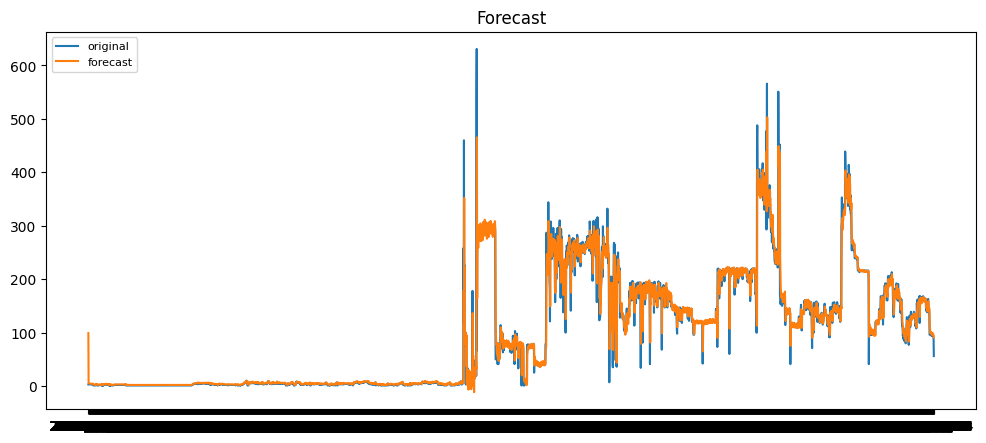

In [68]:
plt.figure(figsize=(12,5), dpi=100)
plt.plot(df_demo, label='original')

plt.plot(final_arima.fittedvalues, label='forecast')
plt.title('Forecast')
plt.legend(loc='upper left', fontsize=8)
plt.show()

In [71]:
input = 

NameError: name 'DateOffset' is not defined

In [73]:
((25-12-2023) - (26-12-2023)).days

AttributeError: 'int' object has no attribute 'days'